In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import pycountry as pc
import pycountry_convert as pyc

# Carga de Datos Limpios

In [9]:
spotify_data = pd.read_csv('spotify_clean.csv',delimiter = ",")
spotify_data.head()

,main_artist,feat_1,feat_2,feat_3,spotify_id,name,daily_rank,daily_movement,weekly_movement,country,...,liveness,valence,tempo,time_signature,release_year,duration_min,key_name,country_name,continent,past_week_rank
0,Lady Gaga,Bruno Mars,NaN,NaN,2plbrEY59IikOBgBGLjaoe,Die With A Smile,1,0,0,Global,...,0.122,0.535,157.969,3,2024,4.19,F#,Global,Global,1
1,ROSÉ,Bruno Mars,NaN,NaN,4wJ5Qq0jBN4ajy7ouZIV1c,APT.,2,0,0,Global,...,0.355,0.939,149.027,4,2024,2.83,C,Global,Global,2
2,Kendrick Lamar,SZA,NaN,NaN,2CGNAOSuO1MEFCbBRgUzjd,luther (with sza),3,0,0,Global,...,0.248,0.576,138.008,4,2024,2.96,D,Global,Global,3
3,Kendrick Lamar,NaN,NaN,NaN,6AI3ezQ4o3HUoP6Dhudph3,Not Like Us,4,0,0,Global,...,0.141,0.214,101.061,4,2024,4.57,C#,Global,Global,4
4,Billie Eilish,NaN,NaN,NaN,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,5,0,0,Global,...,0.117,0.438,104.978,4,2024,3.51,D,Global,Global,5


In [10]:
spotify_data.shape

(1774409, 34)

In [22]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774409 entries, 0 to 1774408
Data columns (total 34 columns):
 #   Column              Dtype         
---  ------              -----         
 0   main_artist         object        
 1   feat_1              object        
 2   feat_2              object        
 3   feat_3              object        
 4   spotify_id          object        
 5   name                object        
 6   daily_rank          int64         
 7   daily_movement      int64         
 8   weekly_movement     int64         
 9   country             object        
 10  snapshot_date       datetime64[ns]
 11  popularity          int64         
 12  is_explicit         int64         
 13  duration_ms         int64         
 14  album_name          object        
 15  album_release_date  datetime64[ns]
 16  danceability        float64       
 17  energy              float64       
 18  key                 int64         
 19  loudness            float64       
 20  mo

In [24]:
# Cambiamos el formato de las fechas
spotify_data['snapshot_date'] = pd.to_datetime(spotify_data['snapshot_date'], format='%Y-%m-%d')
spotify_data['album_release_date'] = pd.to_datetime(spotify_data['album_release_date'], format='%Y-%m-%d')

In [32]:
ultimo_dia= spotify_data['snapshot_date'].max()
spotify_ud = spotify_data[spotify_data['snapshot_date'] == ultimo_dia]

In [34]:
spotify_ud['release_year'].unique()

array([2024, 2025, 2018, 2023, 2015, 2017, 2010, 2000, 1998, 2020, 2021,
       2019, 2012, 2005, 2022, 2007, 2006, 2014, 2008, 2009, 2004, 2013,
       1994, 1986, 2016, 2011, 1977, 1978, 1981, 1982, 1995, 1992, 1966,
       1958, 2001], dtype=int64)

In [36]:
# Obtener la fecha más reciente
ultimo_dia = spotify_data['snapshot_date'].max()

In [38]:
# Filtrar los datos para ese día
spotify_ud = spotify_data[spotify_data['snapshot_date'] == ultimo_dia]

# Mostrar los primeros resultados
print(spotify_ud.head())

      main_artist      feat_1 feat_2 feat_3              spotify_id  \
0       Lady Gaga  Bruno Mars    NaN    NaN  2plbrEY59IikOBgBGLjaoe   
1            ROSÉ  Bruno Mars    NaN    NaN  4wJ5Qq0jBN4ajy7ouZIV1c   
2  Kendrick Lamar         SZA    NaN    NaN  2CGNAOSuO1MEFCbBRgUzjd   
3  Kendrick Lamar         NaN    NaN    NaN  6AI3ezQ4o3HUoP6Dhudph3   
4   Billie Eilish         NaN    NaN    NaN  6dOtVTDdiauQNBQEDOtlAB   

                 name  daily_rank  daily_movement  weekly_movement country  \
0    Die With A Smile           1               0                0  Global   
1                APT.           2               0                0  Global   
2   luther (with sza)           3               0                0  Global   
3         Not Like Us           4               0                0  Global   
4  BIRDS OF A FEATHER           5               0                0  Global   

   ... liveness  valence    tempo  time_signature release_year duration_min  \
0  ...    0.122    0.535 

# Análisis de Datos Exploratorio (Exploratory Data Analysis o EDA)¶

In [41]:
spotify_ud['country'].unique()

array(['Global', 'ZA', 'VN', 'VE', 'UY', 'US', 'UA', 'TW', 'TR', 'TH',
       'SV', 'SK', 'SG', 'SE', 'SA', 'RO', 'PY', 'PT', 'PL', 'PK', 'PH',
       'PE', 'PA', 'NZ', 'NO', 'NL', 'NI', 'NG', 'MY', 'MX', 'MA', 'LV',
       'LU', 'LT', 'KZ', 'KR', 'JP', 'IT', 'IS', 'IN', 'IL', 'IE', 'ID',
       'HU', 'HN', 'HK', 'GT', 'GR', 'FR', 'FI', 'ES', 'EG', 'EE', 'EC',
       'DO', 'DK', 'DE', 'CZ', 'CR', 'CO', 'CL', 'CH', 'CA', 'BY', 'BR',
       'BO', 'BG', 'BE', 'AU', 'AT', 'AR', 'AE'], dtype=object)

In [43]:
spotify_ud['country_name'].unique()

array(['Global', 'South Africa', 'Viet Nam',
       'Venezuela, Bolivarian Republic of', 'Uruguay', 'United States',
       'Ukraine', 'Taiwan, Province of China', 'Türkiye', 'Thailand',
       'El Salvador', 'Slovakia', 'Singapore', 'Sweden', 'Saudi Arabia',
       'Romania', 'Paraguay', 'Portugal', 'Poland', 'Pakistan',
       'Philippines', 'Peru', 'Panama', 'New Zealand', 'Norway',
       'Netherlands', 'Nicaragua', 'Nigeria', 'Malaysia', 'Mexico',
       'Morocco', 'Latvia', 'Luxembourg', 'Lithuania', 'Kazakhstan',
       'Korea, Republic of', 'Japan', 'Italy', 'Iceland', 'India',
       'Israel', 'Ireland', 'Indonesia', 'Hungary', 'Honduras',
       'Hong Kong', 'Guatemala', 'Greece', 'France', 'Finland', 'Spain',
       'Egypt', 'Estonia', 'Ecuador', 'Dominican Republic', 'Denmark',
       'Germany', 'Czechia', 'Costa Rica', 'Colombia', 'Chile',
       'Switzerland', 'Canada', 'Belarus', 'Brazil',
       'Bolivia, Plurinational State of', 'Bulgaria', 'Belgium',
       'Australia

In [45]:
# Ordenar por 'country' y 'popularity' en orden descendente
df_sorted = spotify_ud.sort_values(['country', 'popularity'], ascending=[True, False])

# Obtener el Top 10 por país
top_10_by_country = df_sorted.groupby('country').head(10)

# Mostrar los resultados
print(top_10_by_country[['country', 'name', 'main_artist', 'popularity']])


     country                                               name  \
3553      AE                                   Die With A Smile   
3556      AE                                 BIRDS OF A FEATHER   
3591      AE                                               DtMF   
3557      AE                                        Not Like Us   
3562      AE                                     That’s So True   
...      ...                                                ...   
59        ZA                                  luther (with sza)   
82        ZA                                               APT.   
78        ZA                                          Residuals   
56        ZA  Biri Marung (feat. Sje Konka, Focalistic, DJ M...   
77        ZA                                               Laho   

         main_artist  popularity  
3553       Lady Gaga          96  
3556   Billie Eilish          94  
3591       Bad Bunny          94  
3557  Kendrick Lamar          92  
3562   Gracie Abrams

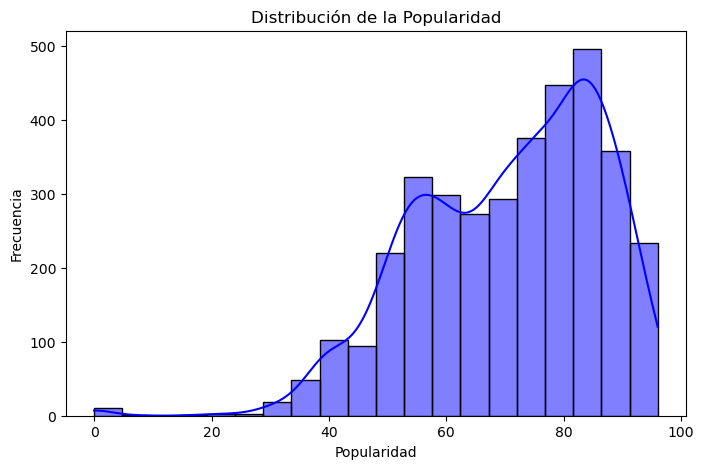

In [47]:
# Distribución de Popularidad
plt.figure(figsize=(8,5))
sns.histplot(spotify_ud['popularity'], bins=20, kde=True, color='blue')
plt.title('Distribución de la Popularidad')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_17492\2762150499.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')


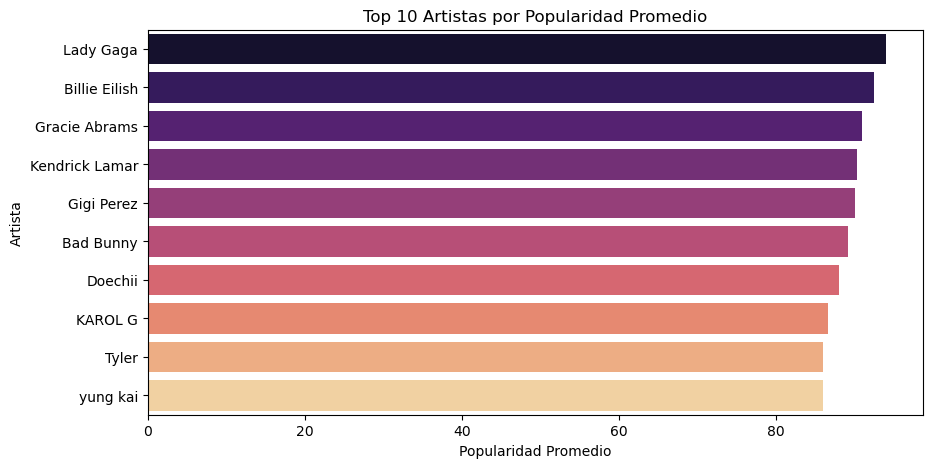

In [49]:
# Top 10 Artistas más Populares
top_artists = spotify_ud.groupby('main_artist')['popularity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')
plt.title('Top 10 Artistas por Popularidad Promedio')
plt.xlabel('Popularidad Promedio')
plt.ylabel('Artista')
plt.show()


In [51]:
fig = go.Figure(go.Bar(
            x=[20, 14, 23],
            y=['giraffes', 'orangutans', 'monkeys'],
            orientation='h'))

fig.show()

NameError: name 'go' is not defined

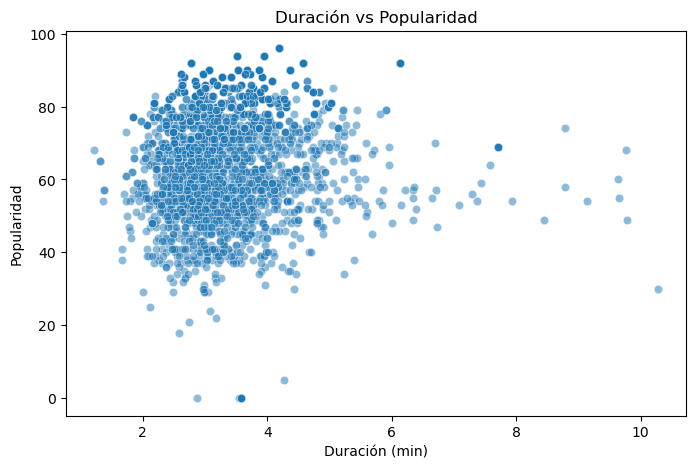

In [53]:
# Relación entre Popularidad y Duración de Canciones
plt.figure(figsize=(8,5))
sns.scatterplot(x=spotify_ud['duration_ms']/60000, y=spotify_ud['popularity'], alpha=0.5)
plt.title('Duración vs Popularidad')
plt.xlabel('Duración (min)')
plt.ylabel('Popularidad')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_17492\1613052823.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='country_name', y='popularity', data=df_top_countries, palette='Set2')


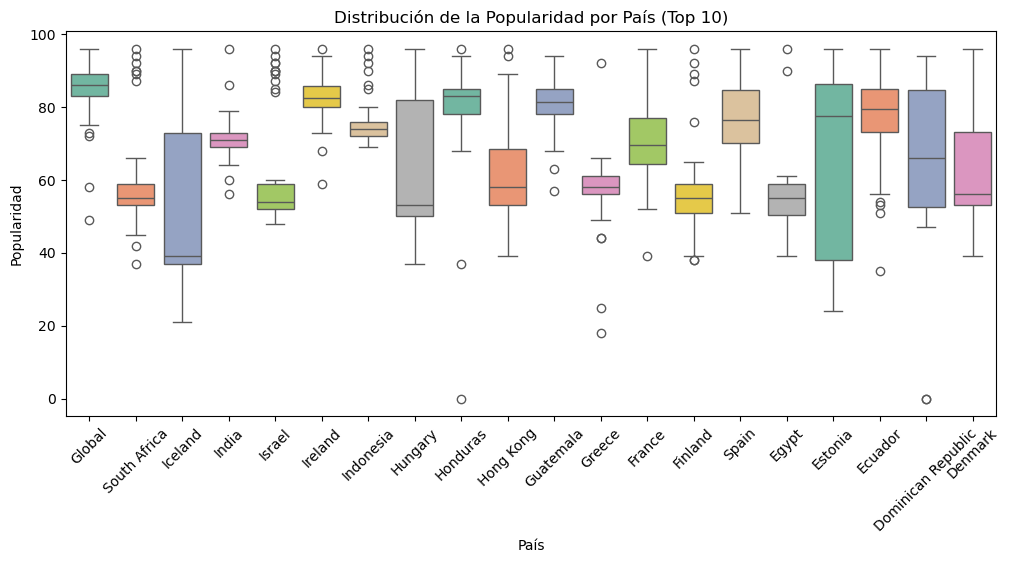

In [55]:
# Popularidad de Canciones por País
top_countries = spotify_ud['country_name'].value_counts().head(20).index
df_top_countries = spotify_ud[spotify_ud['country_name'].isin(top_countries)]

plt.figure(figsize=(12,5))
sns.boxplot(x='country_name', y='popularity', data=df_top_countries, palette='Set2')
plt.title('Distribución de la Popularidad por País (Top 10)')
plt.xlabel('País')
plt.ylabel('Popularidad')
plt.xticks(rotation=45)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_17492\3660848090.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='key_name', y='popularity', data=df_top_countries, palette='Set2')


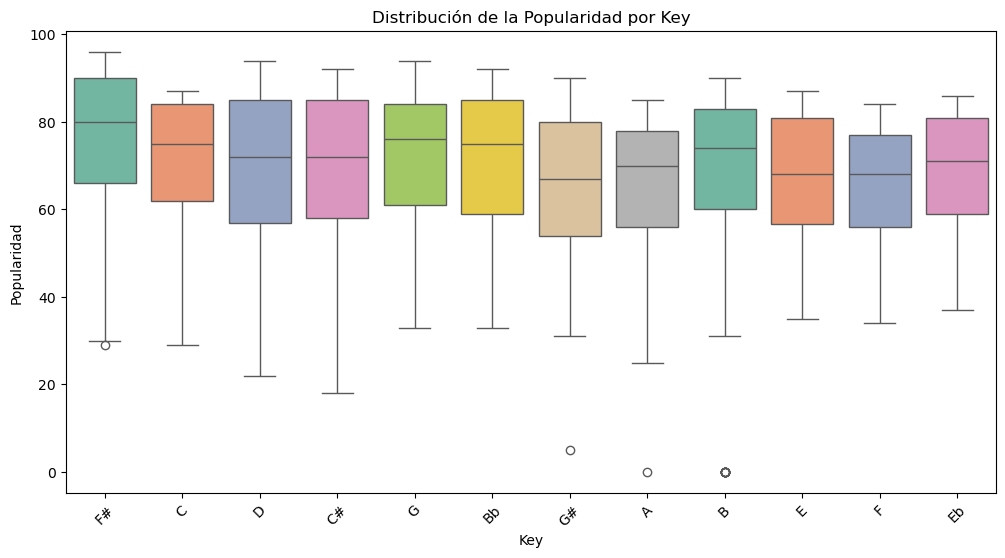

In [57]:
# Popularidad de Canciones por País
top_countries = spotify_ud['key_name'].value_counts().index
df_top_countries = spotify_ud[spotify_ud['key_name'].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.boxplot(x='key_name', y='popularity', data=df_top_countries, palette='Set2')
plt.title('Distribución de la Popularidad por Key')
plt.xlabel('Key')
plt.ylabel('Popularidad')
plt.xticks(rotation=45)
plt.show()


In [74]:
# Convertir snapshot_date a formato datetime si no lo está
spotify_data['snapshot_date'] = pd.to_datetime(spotify_data['snapshot_date'])

# Obtener la última semana
last_week = spotify_data["snapshot_date"].max() - pd.Timedelta(days=7)
df_last_week = spotify_data[spotify_data["snapshot_date"] >= last_week]

# Ordenar por popularidad descendente
df_sorted = df_last_week.sort_values(by="popularity", ascending=False)

# Eliminar duplicados basados en la columna 'name' (manteniendo el más popular)
df_unique = df_sorted.drop_duplicates(subset=["name"], keep="first")

# Seleccionar el top 10
top_10_songs = df_sorted.head(10)
top10id = top_10_songs["spotify_id"]


In [76]:
# Mostrar resultado
top10id = top_10_songs["spotify_id"]
top10id

15232    2plbrEY59IikOBgBGLjaoe
12710    2plbrEY59IikOBgBGLjaoe
27256    2plbrEY59IikOBgBGLjaoe
18000    2plbrEY59IikOBgBGLjaoe
12955    2plbrEY59IikOBgBGLjaoe
12913    2plbrEY59IikOBgBGLjaoe
12861    2plbrEY59IikOBgBGLjaoe
12805    2plbrEY59IikOBgBGLjaoe
27311    2plbrEY59IikOBgBGLjaoe
12763    2plbrEY59IikOBgBGLjaoe
Name: spotify_id, dtype: object

In [94]:
df_canciones = spotify_ud.sort_values(['country', 'daily_rank'], ascending=[True, False])
df_canciones[['main_artist','name','country_name','daily_rank']]

,main_artist,name,country_name,daily_rank
3599,One Direction,Night Changes,United Arab Emirates,50
3598,Jin,The Astronaut,United Arab Emirates,49
3597,Sabrina Carpenter,Taste,United Arab Emirates,48
3596,Bruno Mars,Just the Way You Are,United Arab Emirates,47
3595,TJ Monterde,Palagi - TJxKZ Version,United Arab Emirates,46
...,...,...,...,...
54,Kelvin Momo,Bo Gogo (feat. Tracy & Thatohatsi),South Africa,5
53,Oscar Mbo,Vuka (feat. Thukuthela),South Africa,4
52,DJ Maphorisa,"Ngibolekeni (feat. Seun1401, LeeMcKrazy, Blxck...",South Africa,3
51,Issa sisdoh,Vuma Dlozi Lami (feat. Ancestral Rituals),South Africa,2


In [ ]:
data['artist_song'] = data['artists'] + ' - ' + data['name']

In [ ]:
import plotly.express as px

In [ ]:
fig = px.choropleth(
    data_frame=pop_artist_per_country,
    locations='country_names',
    locationmode='country names',
    color='artist_song',
    hover_name='artist_song',
    hover_data={'country_names': False},
    projection='natural earth',
    title='Most popular artist per country',
)

fig.show()

In [ ]:
Correlations involving songs/artists popularity

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

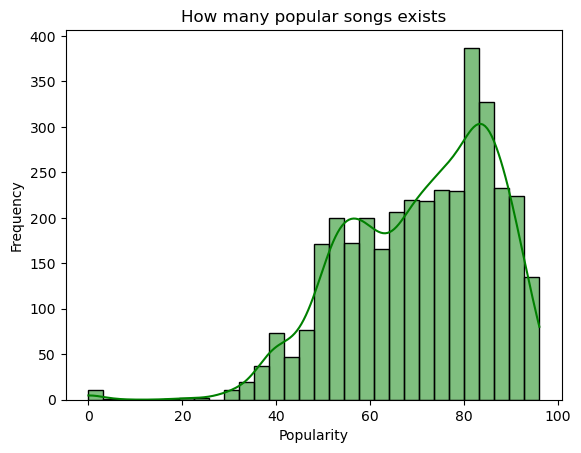

In [61]:
sns.histplot(spotify_ud['popularity'], kde=True, color='green')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Cuantas cancione populares hay')
plt.show()

In [63]:
pop_data = spotify_ud[['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']]

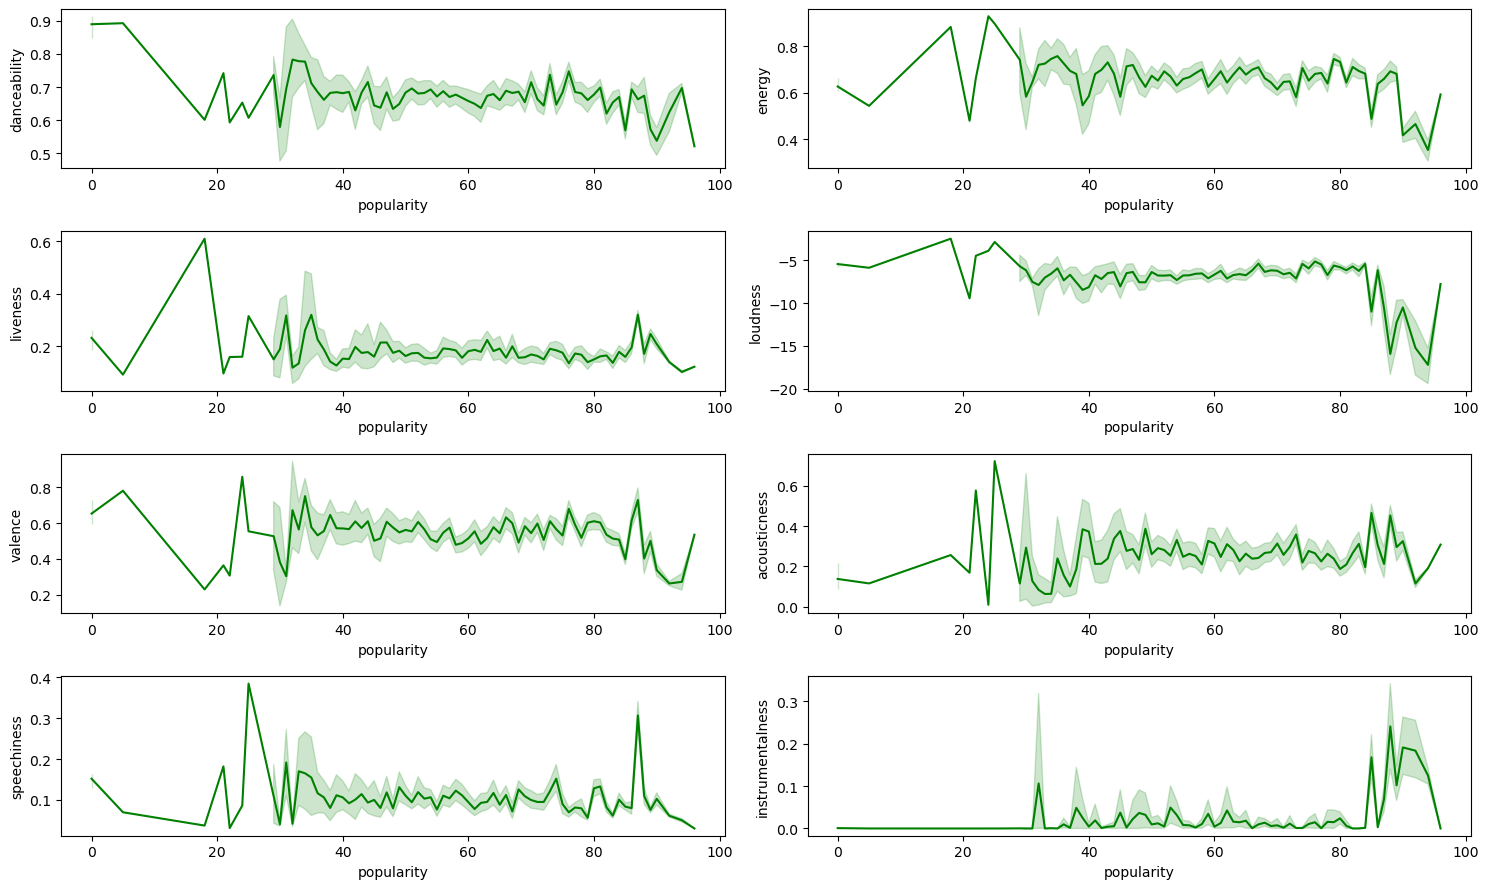

In [65]:
fig, axs = plt.subplots(4,2, figsize=(15,9))

colunas = ['danceability','energy', 'liveness','loudness','valence',
           "acousticness","speechiness",'instrumentalness']

axs = axs.flatten()
for ax, col in zip(axs, colunas):
    sns.lineplot(ax=ax, data=pop_data, x='popularity', y=col, color='green')

# Ajuste layout
plt.tight_layout()

# Mostre a figura
plt.show()

In [67]:
#Correlation by Pearson
corr_table = spotify_ud[[ 'popularity',
       'is_explicit', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature']].corr(method="pearson")

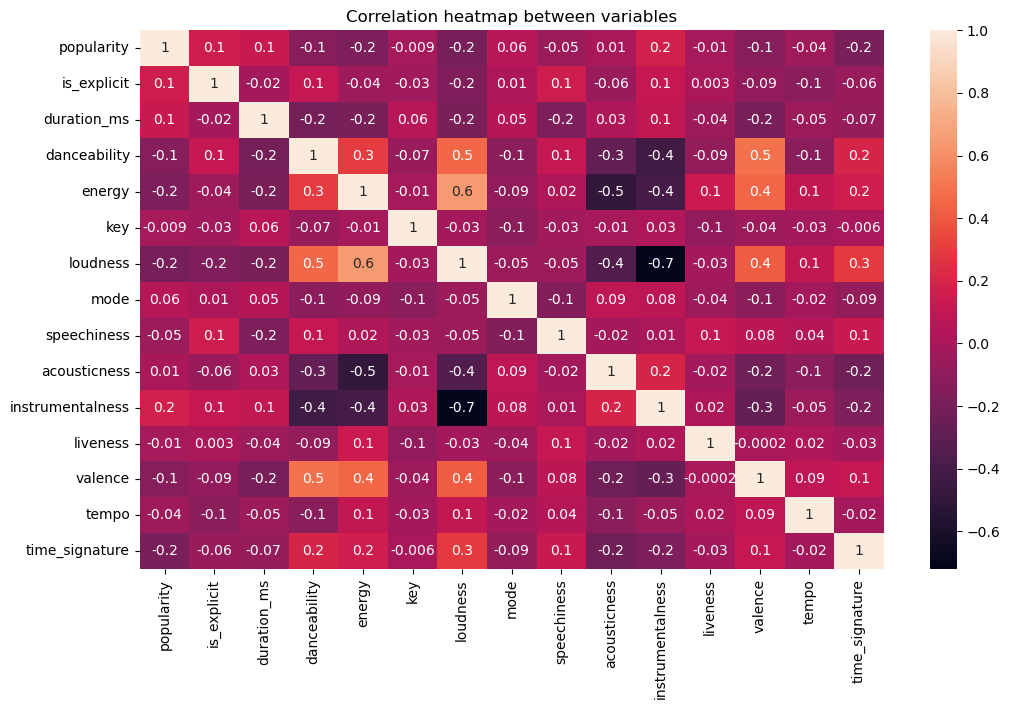

In [141]:
plt.figure(figsize=(12,7))
sns.heatmap(corr_table, annot=True, fmt='.1g')
plt.title("Correlation heatmap between variables")
plt.show()

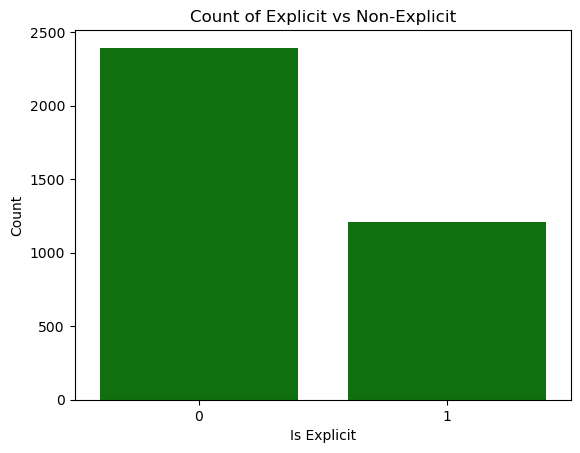

In [73]:
is_explicit_count = spotify_ud[['name',"is_explicit"]].groupby("is_explicit").agg('count').reset_index()
sns.barplot(x='is_explicit', y='name', data=is_explicit_count, color='green')
plt.xlabel('Is Explicit')
plt.ylabel('Count')
plt.title('Count of Explicit vs Non-Explicit')
plt.show()

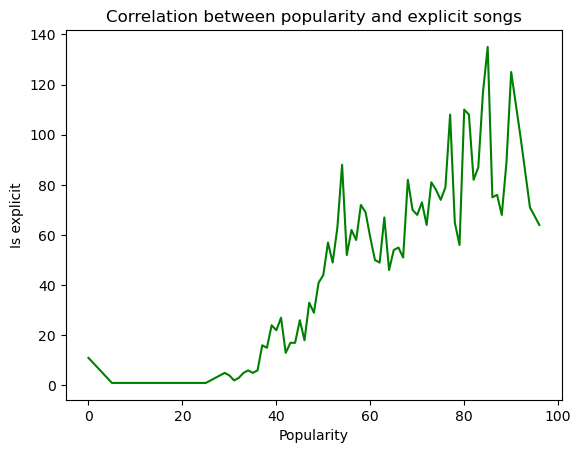

In [75]:
top_explicit = spotify_ud[['popularity',"is_explicit"]].groupby("popularity").agg('count').reset_index()
graph_exp = sns.lineplot(data=top_explicit, x="popularity", y="is_explicit", color='green')
graph_exp.set(title='Correlation between popularity and explicit songs', xlabel='Popularity', ylabel='Is explicit');

In [79]:
spotify_ud['duration_min'] = spotify_ud['duration_ms'].apply(lambda tempo: tempo/60000)

C:\Users\user\AppData\Local\Temp\ipykernel_17492\509970904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_ud['duration_min'] = spotify_ud['duration_ms'].apply(lambda tempo: tempo/60000)


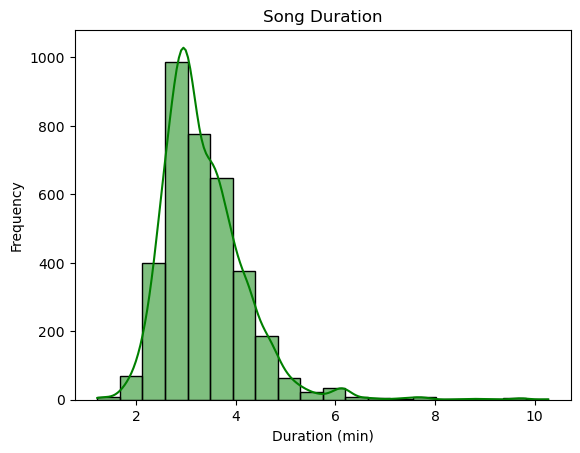

In [81]:
sns.histplot(spotify_ud['duration_min'], bins=20, kde=True, color='green')
plt.title('Song Duration')
plt.xlabel('Duration (min)')
plt.ylabel('Frequency')
plt.show()

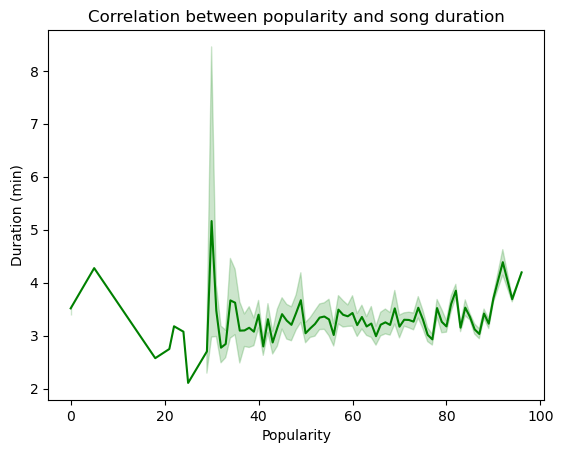

In [83]:
graph_exp = sns.lineplot(spotify_ud, x="popularity", y="duration_min", color='green')
graph_exp.set(title='Correlation between popularity and song duration', xlabel='Popularity', ylabel='Duration (min)');

In [ ]:
Trending Artists/Songs

In [87]:
top_artists = spotify_ud['main_artist'].value_counts()
top_artists = pd.DataFrame(top_artists)
top_artists = top_artists.head(10)

<Figure size 1000x600 with 0 Axes>

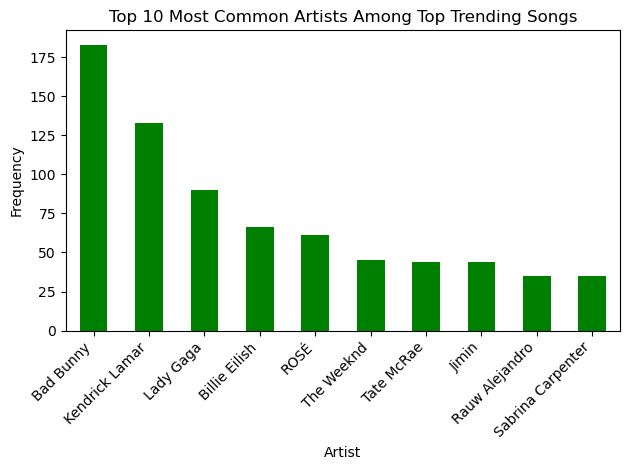

In [89]:
plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar', color='green')
plt.title('Top 10 Most Common Artists Among Top Trending Songs')
plt.xlabel('Artist')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.gca().legend_.remove() if plt.gca().legend_ else None
plt.tight_layout()
plt.show();

In [95]:
top_songs = spotify_ud[["name",'popularity']].loc[0:9].set_index('name')

<Figure size 1200x800 with 0 Axes>

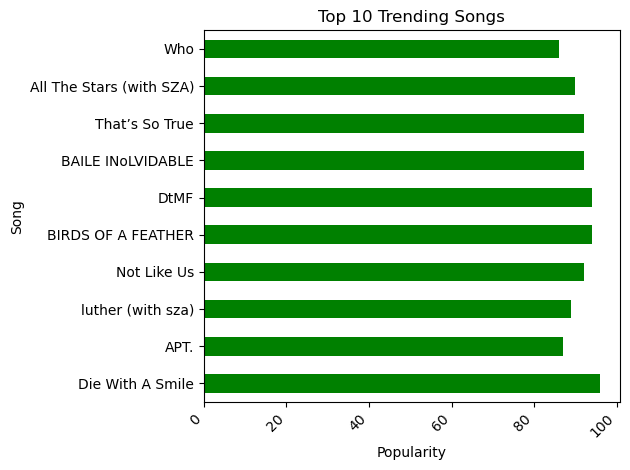

In [97]:
plt.figure(figsize=(12, 8))
top_songs.plot(kind='barh', color='green')
plt.title('Top 10 Trending Songs')
plt.xlabel('Popularity')
plt.ylabel('Song')
plt.xticks(rotation=45, ha='right')
plt.gca().legend_.remove() if plt.gca().legend_ else None
plt.tight_layout()
plt.show();

In [99]:
Songs Metrics

SyntaxError: invalid syntax (2018044922.py, line 1)

In [105]:
key_to_note = {
    0: "C",
    1: "C#/Db",
    2: "D",
    3: "D#/Eb",
    4: "E",
    5: "F",
    6: "F#/Gb",
    7: "G",
    8: "G#/Ab",
    9: "A",
    10: "A#/Bb",
    11: "B"
}

mode_to_note = {
    0: "Minor",
    1: "Major"
}

In [109]:
spotify_ud['key_to_note'] = spotify_ud['key'].map(key_to_note)
spotify_ud['mode_to_note'] = spotify_ud['mode'].map(mode_to_note)

C:\Users\user\AppData\Local\Temp\ipykernel_17492\999614028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_ud['key_to_note'] = spotify_ud['key'].map(key_to_note)
C:\Users\user\AppData\Local\Temp\ipykernel_17492\999614028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_ud['mode_to_note'] = spotify_ud['mode'].map(mode_to_note)


In [111]:
mode_t = spotify_ud[['key_to_note',"mode_to_note"]].groupby(["key_to_note",'mode_to_note']).value_counts().reset_index()

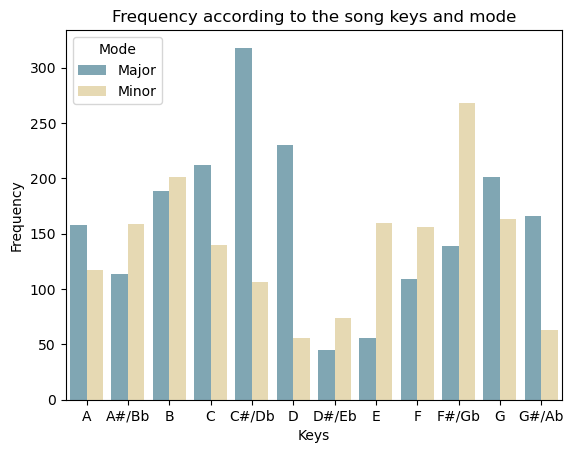

In [117]:
graph_bar_key = sns.barplot(data=mode_t, x="key_to_note", y='count', hue='mode_to_note', palette='blend:#7AB,#EDA')
graph_bar_key.set(title="Frequency according to the song keys and mode", xlabel="Keys", ylabel="Frequency")
graph_bar_key.legend(title="Mode")

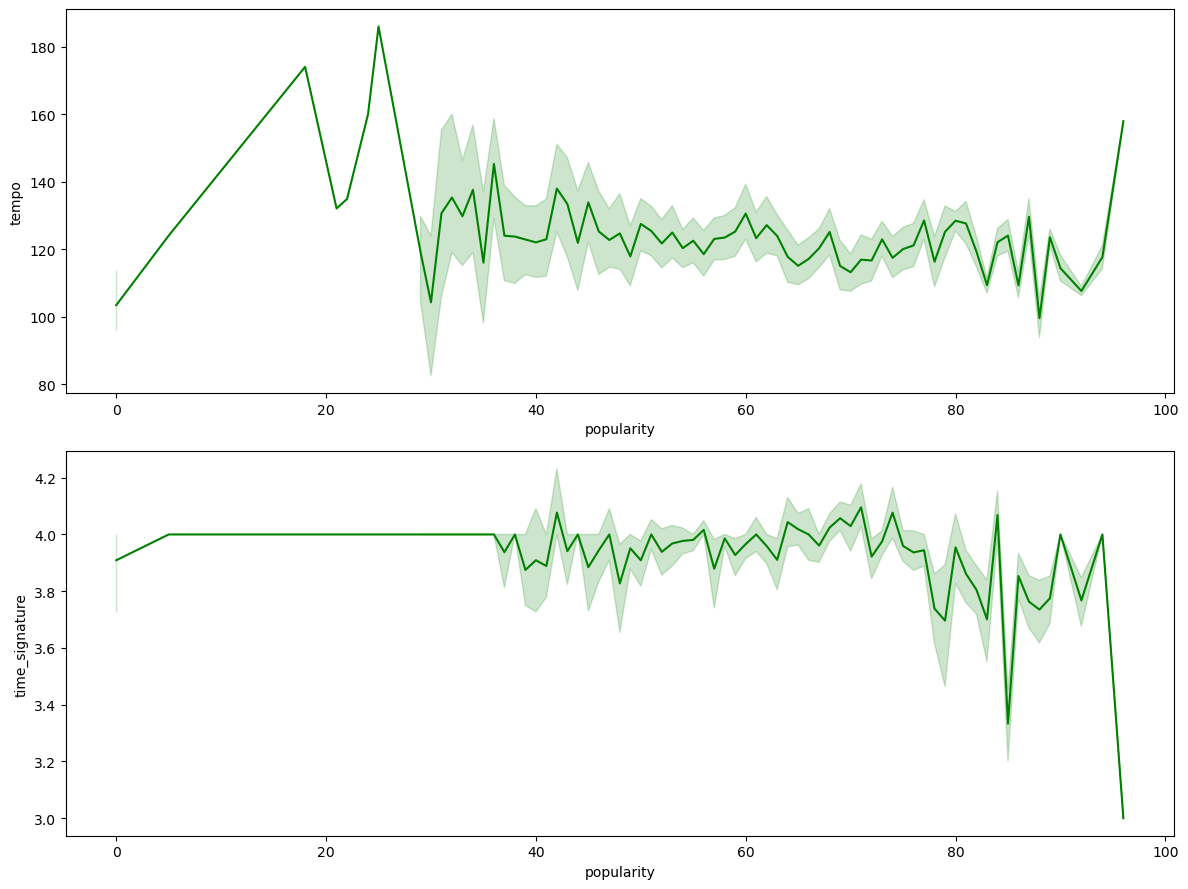

In [119]:
fig, axs = plt.subplots(2,1, figsize=(12,9))
colunas = ['tempo', 'time_signature']

axs = axs.flatten()
for ax, col in zip(axs, colunas):
    sns.lineplot(ax=ax, data=pop_data, x='popularity', y=col, color='green')

# Ajuste layout
plt.tight_layout()

# Mostre a figura
plt.show()

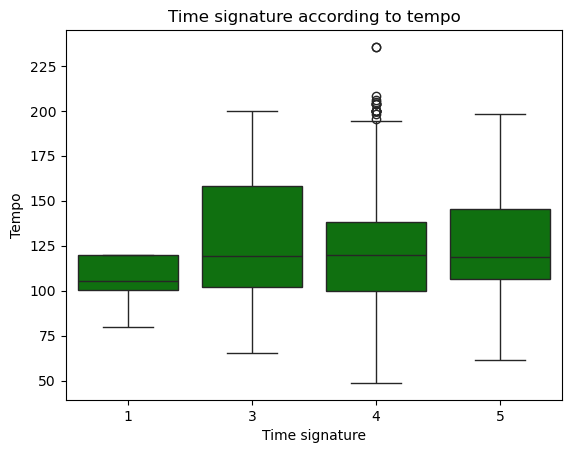

In [123]:
graph_box = sns.boxplot(y=spotify_ud["tempo"], x=spotify_ud["time_signature"], color='green')
graph_box.set(title="Time signature according to tempo", xlabel="Time signature", ylabel="Tempo");

In [ ]:
otro analisis

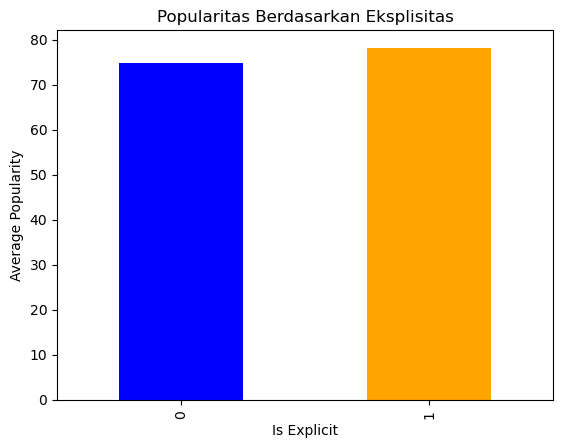

In [127]:
#Popularity Analysis and Visualization
# Calculating Average Popularity Based on Explicitness
explicitness_popularity = spotify_data.groupby('is_explicit')['popularity'].mean()

# Visualizing Popularity Based on Explicitness
explicitness_popularity.plot(kind='bar', color=['blue', 'orange'])
plt.title("Popularitas Berdasarkan Eksplisitas")
plt.xlabel("Is Explicit")
plt.ylabel("Average Popularity")
plt.show()

In [ ]:
Feature Correlation Analysis

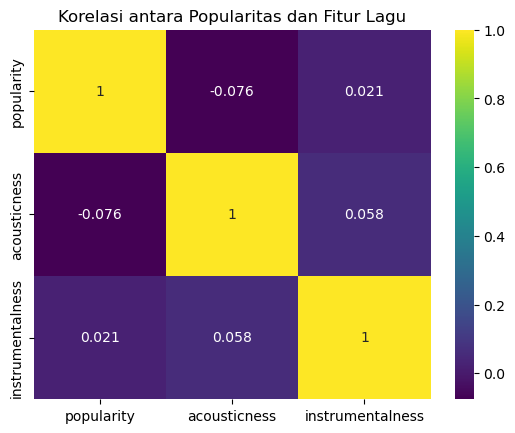

In [129]:
# Calculating Correlation Between Popularity and Acoustic Features
feature_correlation = spotify_data[['popularity', 'acousticness', 'instrumentalness']].corr()

# Visualizing Feature Correlation with Heatmap
sns.heatmap(feature_correlation, annot=True, cmap='viridis')
plt.title("Korelasi antara Popularitas dan Fitur Lagu")
plt.show()

In [131]:
Analysis of Top 10 Ranked Songs

SyntaxError: invalid syntax (3405817120.py, line 1)

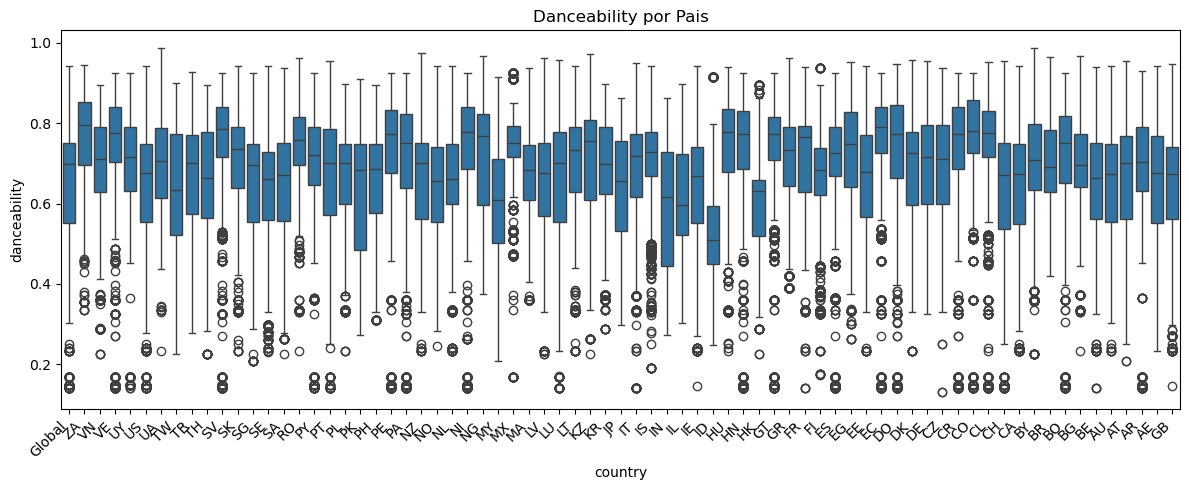

In [139]:
# Filtering Top 10 Ranked Songs
top_songs = spotify_data[spotify_data['daily_rank'] <= 10]

# Removing Rows with Missing Values in Key Columns
top_songs = top_songs.dropna(subset=['country', 'danceability'])

# Filtering Countries with Sufficient Data
country_counts = top_songs['country'].value_counts()
top_countries = country_counts[country_counts >= 10].index
top_songs_filtered = top_songs[top_songs['country'].isin(top_countries)]

# Visualizing Danceability Distribution of Top Songs by Country
plt.figure(figsize=(12, 5))
sns.boxplot(data=top_songs_filtered, x='country', y='danceability')
plt.title("Danceability por Pais")
plt.xticks(rotation=45, ha='right')  # Memutar label negara dan menyelaraskan ke kanan
plt.tight_layout()
plt.show()

In [135]:
continente_sel = 'Europa'
nombres_paises_cont = spotify_ud[spotify_ud['continent'] == continente_sel]
nombres_paises = nombres_paises_cont['country_name'].unique()

In [119]:
nombres_paises

array(['Ukraine', 'Slovakia', 'Sweden', 'Romania', 'Portugal', 'Poland',
       'Norway', 'Netherlands', 'Latvia', 'Luxembourg', 'Lithuania',
       'Italy', 'Iceland', 'Ireland', 'Hungary', 'Greece', 'France',
       'Finland', 'Spain', 'Estonia', 'Denmark', 'Germany', 'Czechia',
       'Switzerland', 'Belarus', 'Bulgaria', 'Belgium', 'Austria'],
      dtype=object)